In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [211]:
df = pd.read_pickle("cleanDataDraft1.pkl")

In [72]:
df = df[df.child > 0]

In [213]:
df['haschild'] = df.child > 0

In [214]:
df

,sex,mstatus,child,age,birth,sp,own,veh,sloc,dwellrate,...,mtgds,heloc,helump,hiedinch,white,black,american_indian,asian,hawaiian,haschild
0,1,4,1,48.0,57.0,2.0,2.0,2,3,7,...,4.0,2,2,0,1,0,0,0,0,True
1,2,1,1,45.0,57.0,2.0,1.0,2,2,8,...,8.0,2,2,0,1,0,0,0,0,True
2,1,1,2,49.0,57.0,1.0,1.0,3,3,10,...,7.0,2,2,1,1,0,0,0,0,True
3,1,4,0,70.0,57.0,2.0,1.0,0,3,8,...,2.0,2,2,0,1,0,0,0,0,False
4,2,6,0,24.0,57.0,2.0,2.0,2,2,10,...,2.0,2,2,0,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,42.0,210.0,2.0,2.0,1,3,7,...,2.0,2,1,1,0,0,0,1,0,True
9996,1,1,0,64.0,57.0,2.0,2.0,1,2,10,...,7.0,2,2,0,0,1,0,0,0,False
9997,1,1,0,66.0,57.0,2.0,1.0,1,2,7,...,1.0,2,2,0,1,0,0,0,0,False
9998,1,3,0,66.0,57.0,2.0,1.0,2,2,10,...,1.0,2,2,0,1,0,0,0,0,False


In [215]:
imp = IterativeImputer(missing_values=np.nan)
x = df.drop('hiedinch', axis=1)
y = df.hiedinch
x = imp.fit_transform(x)



In [238]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [250]:
clf = RandomForestClassifier(class_weight={0:1, 1:8})

In [264]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 8},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [265]:
clf.score(X_test, y_test)

0.9123333333333333

In [266]:
y_true = y

y_pred = clf.predict(x)

In [267]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [268]:
print(tp, fp)

905 83


In [269]:
conf_matrix2 = np.array([[tp, fp],[fn, tn]], dtype=np.int_)

In [270]:
conf_matrix2

array([[ 905,   83],
       [ 236, 8776]])

In [271]:
weights = np.array([[1300, -500], [0, 0]])
weights

array([[1300, -500],
       [   0,    0]])

In [272]:
np.sum(np.multiply(conf_matrix2, weights))

1135000

In [273]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8859
           1       0.92      0.79      0.85      1141

    accuracy                           0.97     10000
   macro avg       0.94      0.89      0.92     10000
weighted avg       0.97      0.97      0.97     10000



(array([6179.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         821.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

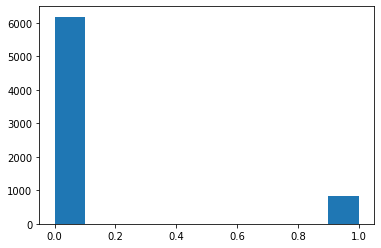

In [274]:
plt.hist(y_train)

(array([2680.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         320.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

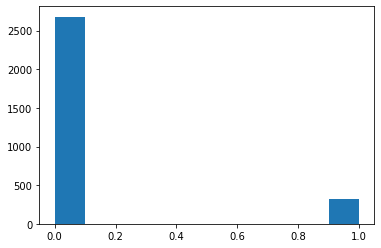

In [275]:
plt.hist(y_test)

In [263]:
conf_matrix

array([[8633,  226],
       [ 489,  652]], dtype=int64)

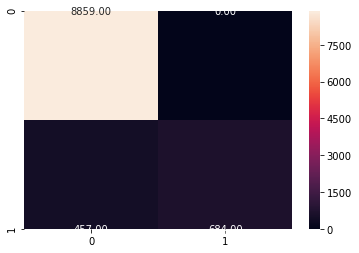

In [206]:
sns.heatmap(conf_matrix,annot=True, fmt='.2f')